In [30]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import statistics

## Пункт 2

salary = 30000 + 20000 × talent + 25000 × education
exam = 30 + 70 × talent

Пусть salary_1 - заработная плата человека с высшим образованием, а  salary_2 - заработная плата человека без высшим образованием

salary_1 - salary_2 = 25000.
Получение высшего образования увеличивает зарплату человека на 25000 рублей  в месяц.

## Пункт 3

In [31]:
data = [i for i in np.arange(0, 1.0025, 0.0025)] 
  
df = pd.DataFrame(data, columns=['talent']) 

In [32]:
df

,talent
0,0.0000
1,0.0025
2,0.0050
3,0.0075
4,0.0100
...,...
396,0.9900
397,0.9925
398,0.9950
399,0.9975


In [33]:
df = df.assign(exam = (30 + 70 * df.talent))

In [34]:
df

,talent,exam
0,0.0000,30.000
1,0.0025,30.175
2,0.0050,30.350
3,0.0075,30.525
4,0.0100,30.700
...,...,...
396,0.9900,99.300
397,0.9925,99.475
398,0.9950,99.650
399,0.9975,99.825


In [35]:
df = df.assign(education = 0)

In [38]:
for i in range(len(df)):
    if df.iloc[i][1] > 80:
        df["education"][i] = 1

C:\Users\10\AppData\Local\Temp\ipykernel_6572\2675794019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education"][i] = 1
C:\Users\10\AppData\Local\Temp\ipykernel_6572\2675794019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education"][i] = 1
C:\Users\10\AppData\Local\Temp\ipykernel_6572\2675794019.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["education"][i] = 1
C:\Users\10\AppData\Local\Temp\ipykernel_65

In [39]:
df

,talent,exam,education
0,0.0000,30.000,0
1,0.0025,30.175,0
2,0.0050,30.350,0
3,0.0075,30.525,0
4,0.0100,30.700,0
...,...,...,...
396,0.9900,99.300,1
397,0.9925,99.475,1
398,0.9950,99.650,1
399,0.9975,99.825,1


In [41]:
df["education"].value_counts()

education
0    286
1    115
Name: count, dtype: int64

In [42]:
df = df.assign(salary = (30000 + 20000 * df.talent + 25000 * df.education))

Первые 10 строк:

In [45]:
df.head(10)

,talent,exam,education,salary
0,0.0000,30.000,0,30000.0
1,0.0025,30.175,0,30050.0
2,0.0050,30.350,0,30100.0
3,0.0075,30.525,0,30150.0
4,0.0100,30.700,0,30200.0
5,0.0125,30.875,0,30250.0
6,0.0150,31.050,0,30300.0
7,0.0175,31.225,0,30350.0
8,0.0200,31.400,0,30400.0
9,0.0225,31.575,0,30450.0


Последние 10 строк:

In [46]:
df.tail(10)

,talent,exam,education,salary
391,0.9775,98.425,1,74550.0
392,0.9800,98.600,1,74600.0
393,0.9825,98.775,1,74650.0
394,0.9850,98.950,1,74700.0
395,0.9875,99.125,1,74750.0
396,0.9900,99.300,1,74800.0
397,0.9925,99.475,1,74850.0
398,0.9950,99.650,1,74900.0
399,0.9975,99.825,1,74950.0
400,1.0000,100.000,1,75000.0


## Пункт 4

In [47]:
agg_func = {
    'salary': ['mean']
}
df.groupby(['education']).agg(agg_func)

,salary
,mean
education,
0,37125.0
1,72150.0


In [48]:
72150.0 - 37125.0

35025.0

Значение разности в 2 и в 4 пункте не совпадают, так как в пункте 2 талант сокращался и не делал разницу(фактически мы рассматривали людей с одинаковым талантом), а в нашей базе у каждого талант различный, поэтому возникает разница + талант влияет на образование через exam

## Пункт 5

In [68]:
new_df = df[df["exam"] <= 85]

In [69]:
new_df = new_df[new_df["exam"] >= 75]

In [70]:
new_df

,talent,exam,education,salary
258,0.6450,75.150,0,42900.0
259,0.6475,75.325,0,42950.0
260,0.6500,75.500,0,43000.0
261,0.6525,75.675,0,43050.0
262,0.6550,75.850,0,43100.0
263,0.6575,76.025,0,43150.0
264,0.6600,76.200,0,43200.0
265,0.6625,76.375,0,43250.0
266,0.6650,76.550,0,43300.0
267,0.6675,76.725,0,43350.0


In [71]:
agg_func = {
    'salary': ['mean']
}
new_df.groupby(['education']).agg(agg_func)

,salary
,mean
education,
0,43575.0
1,70000.0


In [72]:
70000.0 - 43575.0

26425.0

Ответ, полученный пункте 5, как и ответ во 2 далек от ответа в пункте 4(Рассуждения аналогичны пункту 4). 

Ответ, полученный пункте 5,  близок к ответу полученном в 2 пункте, но все же различается
Это все происходит из-за того, чем больше у нас выборка данных, тем сильнее начинают различаться люди в таланте, что в итоге влияет на формулу и усредняет ее для всех. 

Например если взять взыть выборку из 2 человек, где первый - имеет самый высокий талант из тех, у кого нет обучения , а второй - имеет самый низкий талант из тех, кто проходил обучение, то получам разницу в зарплате = 25050(если бы у нас шаг в таланте был бы меньше, чем 0.0025, то и их разница была бы ближе к 25000). 

## Пункт 6

In [74]:
df['exam'].corr(df['salary'])

0.9015569499241896

<Axes: xlabel='exam', ylabel='salary'>

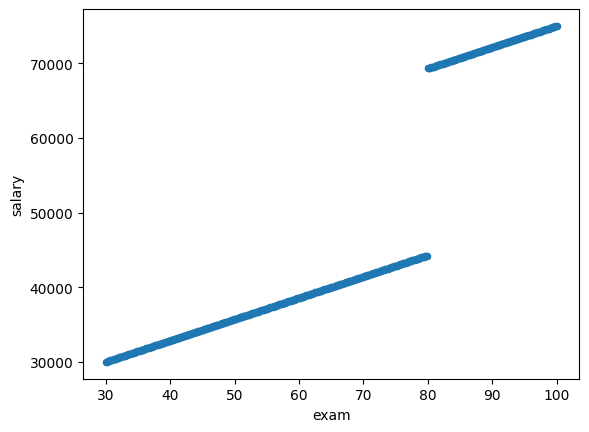

In [78]:
df.plot.scatter(x= 'exam', y = 'salary')

<Axes: xlabel='salary', ylabel='exam'>

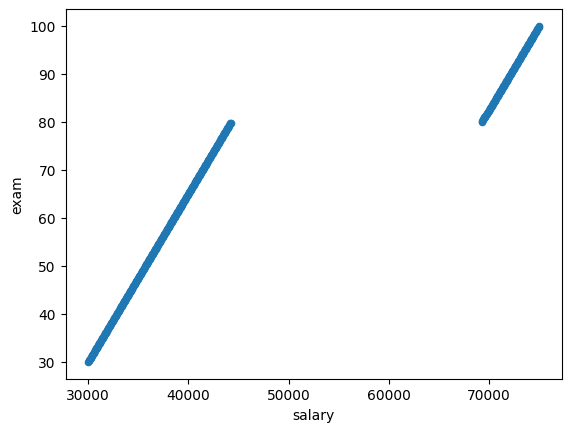

In [80]:
df.plot.scatter(x= 'salary', y = 'exam')

<img src='point6_graph.png' width=600, heigth=800>

Функция является линейной и по графику видно, что получив больше 80 баллов по exam, salary увеличивается на 69300 - 44250 = 25050(скачок) и продолжает также расти. 

В итоге оценка с ответом Пункта 2 почти совпадает.